# Specific stellar angular momentum ($\lambda$ parameter)

From Toloba et al. 2015:

$\lambda_R = \dfrac{\Sigma^N_{i=1} F_i R_i |V_i|}{\Sigma^N_{i=1} F_i R_i \sqrt{V_i^2 + \sigma_i^2}}$

where $N$ is the number of spatial bins in the kinematic profiles, and $F_i, R_i, V_i$, and $\sigma_i$ are the flux, radius, rotation velocity, and velocity dispersion, respectively, of the $i$th bin


In [1]:
import pynbody
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
from photutils import isophote, aperture_photometry
from photutils import CircularAperture, EllipticalAperture, EllipticalAnnulus
from photutils.isophote import EllipseGeometry, Ellipse
from luminosity import surface_brightness

In [2]:
snap = "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036"
s = pynbody.load(snap)

In [3]:
pynbody.analysis.halo.center(s.s, vel=False)

In [4]:
s.properties['boxsize'] = pynbody.units.Unit("4 Mpc")

In [5]:
s.properties

{'omegaM0': 1.0,
 'omegaL0': 0.72,
 'boxsize': Unit("4.00e+00 Mpc"),
 'a': 0.9803378872580908,
 'h': 0.7,
 'time': Unit("1.03e+01 s kpc km**-1")}

In [6]:
s

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036" len=3999940>

In [7]:
s.s

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036::star" len=140168>

In [8]:
sphere = pynbody.filt.Sphere('5 kpc')
sphere

Sphere('5.00e+00 kpc', array([0, 0, 0]))

In [9]:
subsnap = s[sphere]

In [10]:
subsnap.s

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036:sphere::star" len=120840>

In [11]:
width = 8
resolution=500

In [12]:
pynbody.analysis.angmom.ang_mom_vec(subsnap.s)

array([ 0.14928177, -0.2040173 ,  0.29955146], dtype=float32)

In [13]:
pynbody.analysis.angmom.sideon(subsnap.s)

In [14]:
# not rotated: array([0.34567603, 0.24345735, 1.00715   ], dtype=float32)
L = pynbody.analysis.angmom.ang_mom_vec(subsnap.s)
L

array([-6.1025083e-05,  4.4367400e-01, -8.0604528e-05], dtype=float32)

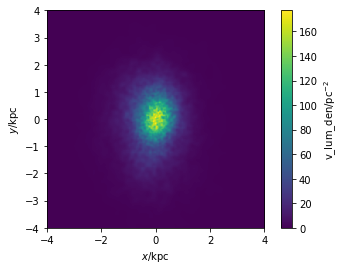

In [15]:
pc2 = pynbody.plot.sph.image(subsnap.s, qty='v' + '_lum_den', units='pc^-2',
                             width=width, log=False, resolution=resolution)

/home/michele/sim/analysis/color.py:19: RuntimeWarning: divide by zero encountered in log10
  img_mag_arcsec2 = -2.5 * np.log10(image * pc2_to_sqarcsec)


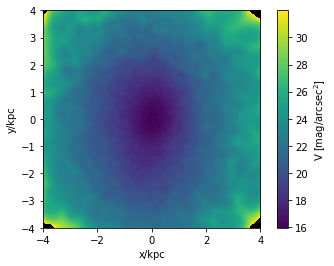

In [20]:
surface_brightness(subsnap, width=width, resolution=resolution, mag_filter=32);

In [17]:
angle =np.arctan(np.abs(L[2]/L[1])) *180/np.pi
angle

0.010409217466496022

In [18]:
subsnap.rotate_x(angle)

In [19]:
pynbody.analysis.angmom.ang_mom_vec(s.s)

array([ 0.0525179 ,  0.8217688 , -0.79017204], dtype=float32)

In [20]:
# pynbody.plot.stars.render(s.s, width='8 kpc')

pynbody.snapshot : Deriving array v_lum_den
pynbody.sph : Rendering image on 8 threads...


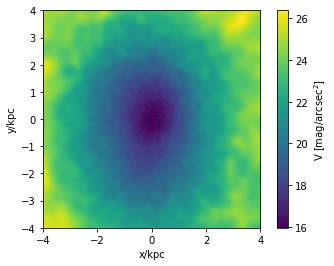

In [21]:
surface_brightness(s, width=width, resolution=resolution);

In [22]:
# s.s['goodsmooth'] = s.s['smooth'].copy()

In [23]:
# s.s['goodsmooth'][s.s['goodsmooth'] > 30] = 30

pynbody.snapshot : Deriving array r


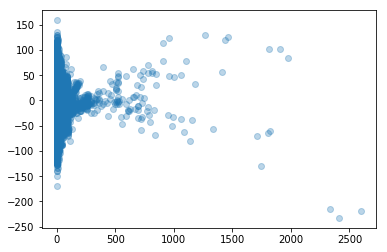

In [24]:
plt.scatter(s.s['r'], s.s['vz'], alpha=0.3)

In [25]:
s.s

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036::star" len=140168>

In [26]:
s.s[sphere]

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036::star:sphere" len=120837>

In [27]:
subsnap.s

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036:sphere::star" len=120840>

In [28]:
pynbody.analysis.angmom.ang_mom_vec(subsnap.g)

array([-4.1524024,  2.0792878, -1.8185307], dtype=float32)

In [29]:
pynbody.analysis.angmom.sideon(subsnap.g)

pynbody.analysis.angmom : Finding halo center...
pynbody.analysis._com : Initial rough COM=[-0.06578992  0.03463557 -0.33839952]
pynbody.analysis.halo : Final SSC=[ 0.21877222 -0.19425927  0.09748151]
pynbody.analysis.angmom : ... cen=[ 0.21877222 -0.19425927  0.09748151]
pynbody.analysis.halo : Finding halo velocity center...
pynbody.analysis.halo : vcen=[ 2.77403    1.2797685 -3.9074476]
pynbody.analysis.angmom : Calculating angular momentum vector...
pynbody.analysis.angmom : Transforming simulation...
pynbody.analysis.angmom : ...done!


In [30]:
pynbody.analysis.angmom.ang_mom_vec(subsnap.g)

array([-0.00827856,  5.0835843 ,  0.01762435], dtype=float32)

In [43]:
subsnap

<SimSnap "/home/michele/sim/MoRIA/M1-10_Verbeke2017/M10sim41001/snapshot_0036:sphere" len=250221>

pynbody.sph : Rendering image on 8 threads...
pynbody.sph : Rendering image on 8 threads...
/home/michele/Software/miniconda3/envs/just_py3/lib/python3.6/site-packages/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)


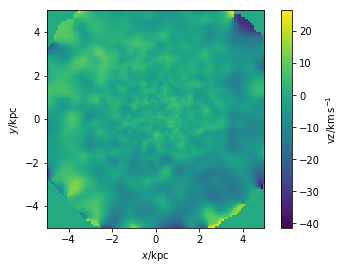

In [46]:
v_los_sim = pynbody.plot.sph.image(subsnap.s, qty='vz', smooth='smooth', av_z=True,
                                   threaded=None, width=10, resolution=100, log=False)

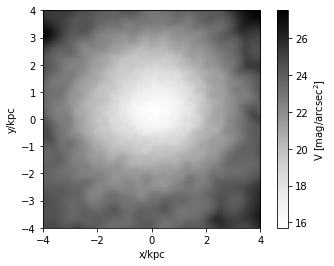

In [40]:
luminosity_sim = surface_brightness(s, band='v', width=width, resolution=resolution, mag_filter=None, cmap_name='Greys')

In [8]:
# lum_s = pynbody.plot.sph.image(s.s, qty='v_lum_den', units="pc**-2", width=width, resolution=resolution, log=True, cmap='Greys_r')

In [9]:
sphere = pynbody.filt.Sphere(10)

pynbody.sph : Rendering image on 8 threads...


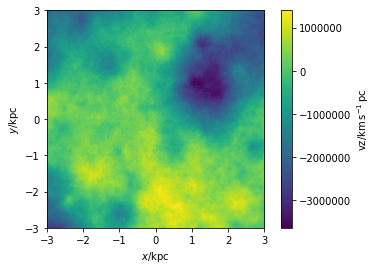

In [11]:
s.s['pos'].max()

SimArray(1677.0741, dtype=float32, 'kpc')

pynbody.snapshot : Deriving array v_disp
pynbody.derived : Calculating velocity dispersion with 32 nearest neighbours
pynbody.derived : Velocity dispersion done in 0.126 s
pynbody.sph : Rendering image on 8 threads...
pynbody.sph : Rendering image on 8 threads...


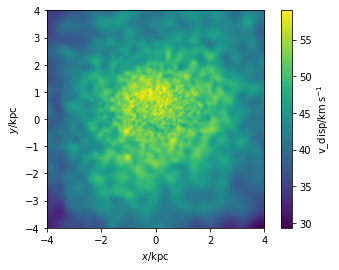

In [11]:
v_disp_sim = pynbody.plot.sph.image(s.s, qty='v_disp', av_z='rho', width=width, resolution=resolution, log=False)

In [12]:
# def sigma(vel):
#     return np.sqrt(((vel - vel.mean(axis=0))**2).mean())

In [13]:
# sigma_s = sigma(s.s['vel'])

In [14]:
def to_astropy_quantity(simarr, units=None):
    return u.Quantity(simarr.view(type=np.ndarray), unit=units if units is not None else str(simarr.units))

In [15]:
lum = to_astropy_quantity(luminosity_sim, units='mag/arcsec**2')
v_los = to_astropy_quantity(v_los_sim)
v_disp = to_astropy_quantity(v_disp_sim)

In [16]:
# img[np.isnan(img)] = 0  # in case I used the `mag_filter` parameter

In [17]:
lum, v_los, v_disp

(<Quantity [[27.707355, 27.69133 , 27.67658 , ..., 28.896812, 28.909481,
             28.924124],
            [27.690205, 27.674826, 27.661173, ..., 28.891352, 28.907225,
             28.915676],
            [27.673838, 27.658413, 27.645414, ..., 28.884336, 28.900372,
             28.916222],
            ...,
            [28.60531 , 28.600952, 28.596298, ..., 28.039227, 28.04086 ,
             28.046398],
            [28.617056, 28.61289 , 28.608858, ..., 28.048632, 28.051502,
             28.051865],
            [28.627207, 28.623962, 28.62345 , ..., 28.058989, 28.061234,
             28.060238]] mag / arcsec2>,
 <Quantity [[-4.735952 , -4.733384 , -4.734538 , ..., -5.025687 ,
             -5.0464754, -5.0526834],
            [-4.73259  , -4.729573 , -4.7286353, ..., -5.050284 ,
             -5.0520434, -5.05308  ],
            [-4.7287755, -4.7277923, -4.726528 , ..., -5.049295 ,
             -5.0507107, -5.0450964],
            ...,
            [-4.9405794, -4.929429 , -4.927697 , .

### Photometry

In [18]:
center = (resolution/2, resolution/2)

In [19]:
theta = 70*np.pi/180

In [20]:
ell_aperture = EllipticalAperture(center, a=80, b=40, theta=theta)

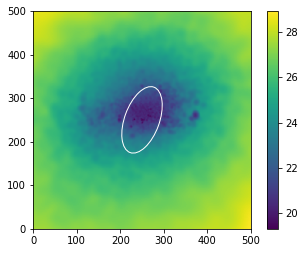

In [21]:
img = plt.imshow(lum.data, origin='lower')
ell_aperture.plot(color='white')
plt.colorbar(img);

In [22]:
annulus = EllipticalAnnulus(center, a_in=80, a_out=100, b_out=40, theta=theta)

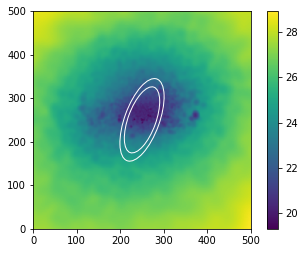

In [23]:
img = plt.imshow(lum.data, origin='lower')
annulus.plot(color='white')
plt.colorbar(img);

In [24]:
annulus_table = aperture_photometry(lum, annulus)
annulus_table

id,xcenter,ycenter,aperture_sum
,pix,pix,mag / arcsec2
int64,float64,float64,float64
1,250.0,250.0,101740.28629576426


In [25]:
eccentricity = 0.5
a_delta = 20
theta = 70*np.pi/180

radii = np.arange(30, 200, a_delta)
print(radii)

b = radii * np.sqrt(1 - eccentricity**2)
apertures = [EllipticalAnnulus(center, a_in=r-a_delta, a_out=r+a_delta, b_out=b_i, theta=theta) for r, b_i in zip(radii, b)]
flux_table = aperture_photometry(lum, apertures)
for col in flux_table.colnames:
    flux_table[col].info.format = '%.8g'  # for consistent table output
print(flux_table)

[ 30  50  70  90 110 130 150 170 190]
 id xcenter ycenter ... aperture_sum_6 aperture_sum_7 aperture_sum_8
      pix     pix   ... mag / arcsec2  mag / arcsec2  mag / arcsec2 
--- ------- ------- ... -------------- -------------- --------------
  1     250     250 ...      707612.56      829264.19      954138.38


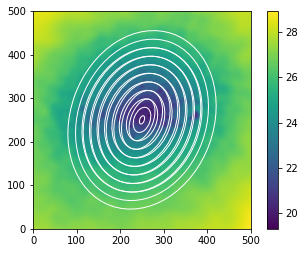

In [26]:
my_img = plt.imshow(lum.data, origin='lower')
for ann in apertures:
    ann.plot(color='white')
plt.colorbar(my_img);

In [27]:
flux_table['aperture_sum_0'][0].data

In [28]:
def integrate_annulus(qty, center, radii, eccentricity, a_delta, theta):
    b = radii * np.sqrt(1 - eccentricity**2)
    apertures = [EllipticalAnnulus(center, a_in=r-a_delta, a_out=r+a_delta, b_out=b_i, theta=theta) for r, b_i in zip(radii, b)]
    flux_table = aperture_photometry(qty, apertures)
#     for col in flux_table.colnames:
#         flux_table[col].info.format = '%.8g'  # for consistent table output
#     print(flux_table)
    return u.Quantity(np.array([flux_table['aperture_sum_{}'.format(i)][0].value for i in range(len(radii))]), unit=flux_table['aperture_sum_0'].unit)

In [29]:
eccentricity = 0.5
a_delta = 20
theta = 70*np.pi/180

radii = np.arange(30, 200, a_delta)

In [30]:
lum_table = integrate_annulus(lum, center, radii, eccentricity, a_delta, theta)
lum_table

<Quantity [ 82424.48720413, 168253.26430909, 263897.07311507,
           367412.16584723, 477087.95292853, 590604.40482351,
           707612.56391163, 829264.19277329, 954138.38053447] mag / arcsec2>

In [31]:
# np.array([lum_table['aperture_sum_{}'.format(i)][0] for i in range(len(radii))])

In [32]:
v_los_table = integrate_annulus(v_los, center, radii, eccentricity, a_delta, theta)
v_los_table

<Quantity [ -20635.87347753,  -40514.52573988,  -61412.56092446,
            -83064.73088752, -105064.07189019, -126907.63262539,
           -148663.94654316, -170671.37869435, -191408.32661111] km / s>

In [33]:
v_disp_table = integrate_annulus(v_disp, center, radii, eccentricity, a_delta, theta)
v_disp_table

<Quantity [ 207029.91745065,  412601.00985595,  627643.76145643,
            838497.86496737, 1038004.91819487, 1219891.30761102,
           1397364.66418822, 1569494.51268081, 1726804.65662198] km / s>

In [34]:
def ss_angmom(flux, r, v_los, v_disp):
    return np.sum(flux * r * np.abs(v_los)) / np.sum(flux * r * np.sqrt(v_los**2 + v_disp**2))

In [35]:
stellar_specific_angmom = np.sum(lum_table * radii * np.abs(v_los_table)) / np.sum(lum_table * radii * np.sqrt(v_los_table**2 + v_disp_table**2))
stellar_specific_angmom

<Quantity 0.10700525>

# Putting all together

In [36]:
def compute_stellar_specific_angmom(snap, width, resolution, radii, eccentricity, a_delta, theta):
    luminosity_sim = surface_brightness(snap.s, band='v', width=width, resolution=resolution, mag_filter=None, cmap_name='Greys')
    v_los_sim = pynbody.plot.sph.image(snap.s, qty='vz', av_z='rho', width=width, resolution=resolution, log=False)
    v_disp_sim = pynbody.plot.sph.image(snap.s, qty='v_disp', av_z='rho', width=width, resolution=resolution, log=False)
    lum = to_astropy_quantity(luminosity_sim, units='mag/arcsec**2')
    v_los = to_astropy_quantity(v_los_sim)
    v_disp = to_astropy_quantity(v_disp_sim)
    lum_annuli = integrate_annulus(lum, center, radii, eccentricity, a_delta, theta)
    v_los_annuli = integrate_annulus(v_los, center, radii, eccentricity, a_delta, theta)
    v_disp_annuli = integrate_annulus(v_disp, center, radii, eccentricity, a_delta, theta)
    stellar_specific_angmom = ss_angmom(lum_annuli, radii, v_los_annuli, v_disp_annuli)
    return stellar_specific_angmom

pynbody.sph : Rendering image on 8 threads...


KeyboardInterrupt: 

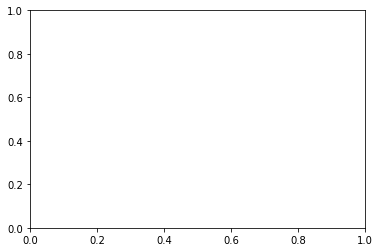

In [37]:
compute_stellar_specific_angmom(s, width, resolution, radii, eccentricity, a_delta, theta)

### Fit ellipse and find isophotal

In [ ]:
init_geometry = EllipseGeometry(x0=resolution/2, y0=resolution/2, sma=80, eps=0.5, pa=120.*np.pi/180.)

aper = EllipticalAperture((init_geometry.x0, init_geometry.y0), init_geometry.sma,
                           init_geometry.sma*(1 - init_geometry.eps),
                           init_geometry.pa)
plt.imshow(img, origin='lower')
aper.plot(color='white')

In [ ]:
ellipse = Ellipse(img, init_geometry)
ellipse

In [ ]:
isolist = ellipse.fit_image()

In [ ]:
isolist.pa

In [ ]:
# isolist.to_table()

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(hspace=0.35, wspace=0.35)

plt.subplot(2, 2, 1)
plt.errorbar(isolist.sma, isolist.eps, yerr=isolist.ellip_err,
             fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('Ellipticity')

plt.subplot(2, 2, 2)
plt.errorbar(isolist.sma, isolist.pa/np.pi*180.,
             yerr=isolist.pa_err/np.pi* 80., fmt='o', markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('PA (deg)')

plt.subplot(2, 2, 3)
plt.errorbar(isolist.sma, isolist.x0, yerr=isolist.x0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('x0')

plt.subplot(2, 2, 4)
plt.errorbar(isolist.sma, isolist.y0, yerr=isolist.y0_err, fmt='o',
             markersize=4)
plt.xlabel('Semimajor Axis Length (pix)')
plt.ylabel('y0')

In [ ]:
from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(img.shape, isolist)
residual = img - model_image

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(img, origin='lower')
ax1.set_title('Data')

smas = np.linspace(10, 50, 5)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower')
ax2.set_title('Ellipse Model')

ax3.imshow(residual, origin='lower')
ax3.set_title('Residual')

# Sersic fit

In [ ]:
from astropy.modeling import models, fitting
resolution=500
# Fit the data using a box model
y, x = np.mgrid[:resolution, :resolution]

In [ ]:
s_init = models.Sersic2D(r_eff=50, n=2, x_0=resolution/2, y_0=resolution/2, ellip=0.7, theta=-np.pi/4,
                         fixed={'amplitude':False, 'n':False, 'ellip':False, 'x_0':True, 'y_0':True},
                         bounds={})#'theta':(0, np.pi)})
fit_s = fitting.SLSQPLSQFitter()
# notnans = np.isfinite(img)
# sersic = fit_s(s_init, x[notnans], y[notnans], img[notnans])
sersic = fit_s(s_init, x, y, img)
sersic

In [ ]:
# Plot the data with the best-fit model
plt.figure(figsize=(8,2.5))
plt.subplot(1,3,1)
plt.imshow(img, origin='lower', interpolation='nearest')
plt.title("Data")
plt.subplot(1,3,2)
plt.imshow(sersic(x, y), origin='lower', interpolation='nearest')
plt.title("Model")
plt.subplot(1,3,3)
plt.imshow(img - sersic(x, y), origin='lower', interpolation='nearest')
plt.title("Residual");

## Gaussian fitting

In [ ]:
# Fit the data using a Gaussian
g_init = models.Gaussian2D(amplitude=1., x_mean=resolution/2, y_mean=resolution/2, x_stddev=1,
                          bounds={'theta':(0, np.pi)})
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y, img)
g

In [ ]:
# plt.imshow(np.log(img), origin='lower')
# plt.colorbar()

In [ ]:
# Plot the data with the best-fit model
plt.figure(figsize=(8,2.5))
plt.subplot(1,3,1)
img_orig = img.copy()
img_orig[img_orig==0]=np.nan
plt.imshow(img_orig, origin='lower', interpolation='nearest')
# cmap=plt.get_cmap()
# cmap.set_bad('k')
plt.title("Data")
plt.subplot(1,3,2)
plt.imshow(g(x, y), origin='lower', interpolation='nearest')
plt.title("Model")
plt.subplot(1,3,3)
plt.imshow(img - g(x, y), origin='lower', interpolation='nearest')
plt.title("Residual");

## Ellipse fitting

In [ ]:
e_init = models.Ellipse2D(amplitude=22, x_0=resolution/2, y_0=resolution/2, a=100, b=50, theta=-np.pi/4,
                          fixed={'amplitude':True, 'x_0':True, 'y_0':True, 'a':True, 'b':True},
                          bounds={'a':(0, 5*resolution), 'b':(0, 5*resolution)})
fit_e = fitting.SLSQPLSQFitter()
e = fit_e(e_init, x, y, img)
e

In [ ]:
# Plot the data with the best-fit model
plt.figure(figsize=(8,2.5))
plt.subplot(1,3,1)
plt.imshow(img, origin='lower', interpolation='nearest')
plt.title("Data")
plt.subplot(1,3,2)
plt.imshow(e(x, y), origin='lower', interpolation='nearest')
plt.title("Model")
plt.subplot(1,3,3)
plt.imshow(img - e(x, y), origin='lower', interpolation='nearest')
plt.title("Residual");

In [ ]:
pynbody.plot.density_profile(s, fit=True, fit_factor=0.5)

In [ ]:
pynbody.plot.stars.sbprofile(s, fit_sersic=True, rmax=10, diskheight=100)